In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('WineQT.csv')
data = data.drop('Id',  axis = 1)
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1138     11.0        6  
1139      9.5        6  
1140     10.5        5  
1141     11.2        6  
1142     10.2        5  

[1143 rows x 12 columns]

<AxesSubplot:>

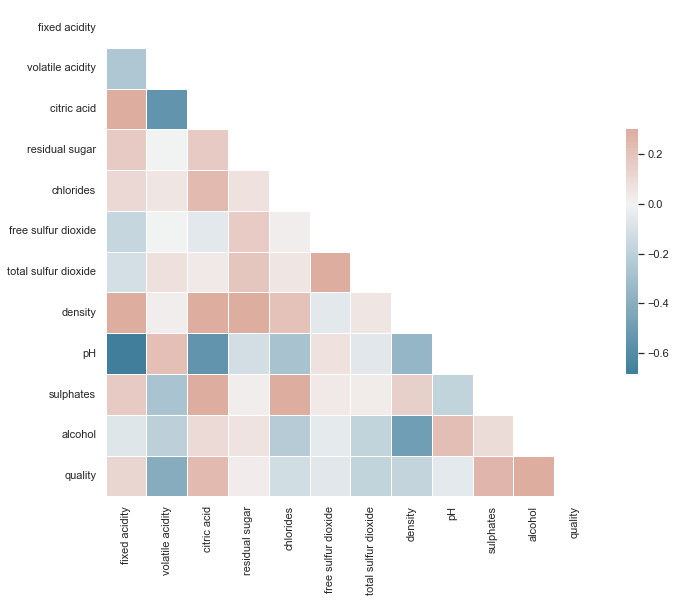

In [4]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043  
std       0.156664     0.170399     1.082196     0.805824  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.205000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

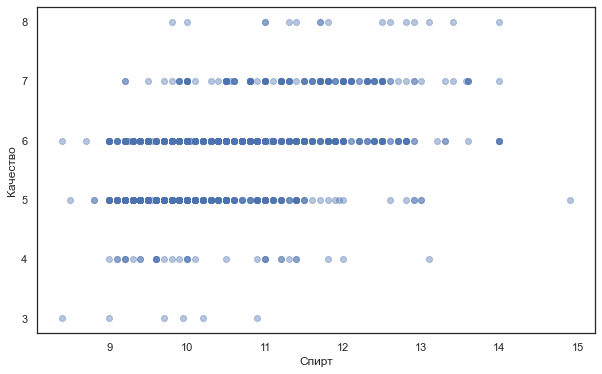

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(data.alcohol, data.quality, alpha = 0.4)
plt.xlabel('Спирт')
plt.ylabel('Качество')
plt.show()

# Линейная регрессия

In [8]:
model = LinearRegression()

In [9]:
x = pd.DataFrame(data.alcohol).values
y = pd.DataFrame(data.quality).values

In [10]:
#разделение выборки на тестовую и тренировочную части
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
model.fit(x_train, y_train)

LinearRegression()

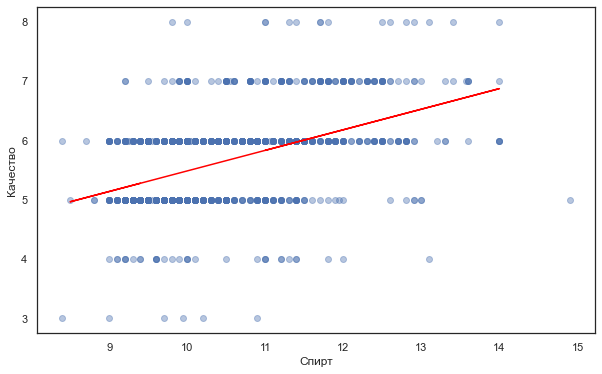

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(data.alcohol, data.quality, alpha = 0.4)

plt.plot(x_test, model.predict(x_test), color = 'red')

plt.xlabel('Спирт')
plt.ylabel('Качество')
plt.show()

In [36]:
model.score(x, y)

0.06641457807350926

In [33]:
model.predict([[10]])

array([[5.48808245]])

# Множественная линейная регрессия

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [18]:
pd.isnull(data).any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [19]:
y = data['quality']
X = data.drop('quality',  axis = 1)


In [21]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

In [23]:
lin_reg_mod = LinearRegression()

In [24]:
lin_reg_mod.fit(X_train, y_train)

LinearRegression()

In [25]:
pred = lin_reg_mod.predict(X_test)

In [27]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

In [41]:
print(test_set_rmse)
print(test_set_r2)

0.699351106952844
0.27357901777155735


In [28]:
pred

array([6.56087233, 5.6807405 , 4.90051976, 5.73011943, 5.02898423,
       5.38627352, 5.59636625, 4.98723264, 5.47745523, 5.21883247,
       5.80670005, 5.23241922, 6.26847029, 6.25942012, 5.81980214,
       5.39382853, 4.87401643, 5.6195479 , 6.22340477, 5.84039492,
       5.01240861, 5.5885749 , 5.14451498, 5.90082557, 5.73276666,
       5.612641  , 5.96998172, 5.45671637, 6.1882898 , 6.09406806,
       6.56788693, 5.71459472, 6.57812646, 5.78589856, 6.49208845,
       5.45097653, 6.21483529, 6.28507265, 5.21014619, 5.02862831,
       5.79997108, 5.2581259 , 5.63120255, 4.99126754, 6.45293831,
       6.26629131, 4.69417813, 6.63237525, 4.85764401, 5.40631006,
       5.54972054, 5.21000897, 5.59636625, 4.99806973, 5.72146901,
       6.08036341, 6.01350748, 6.46718067, 5.77561095, 5.79184003,
       5.65639511, 5.84212877, 5.2799097 , 6.53925844, 5.89330977,
       6.00871021, 5.78177064, 4.87879297, 5.74448972, 5.67687595,
       6.02559279, 5.19080856, 5.36477063, 6.28507265, 6.03572

In [29]:
X_test

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
671             8.3             0.280         0.48             2.1      0.093   
583             7.3             0.490         0.10             2.6      0.068   
627            10.7             0.900         0.34             6.6      0.112   
1090            7.9             0.290         0.49             2.2      0.096   
507             8.9             0.565         0.34             3.0      0.093   
...             ...               ...          ...             ...        ...   
247             7.7             0.665         0.00             2.4      0.090   
854             9.9             0.720         0.55             1.7      0.136   
611             8.2             0.260         0.34             2.5      0.073   
533             7.2             0.500         0.18             2.1      0.071   
972             8.0             0.770         0.32             2.1      0.079   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
671                   6.0                  12.0  0.99408  3.26       0.62   
583                   4.0                  14.0  0.99562  3.30       0.47   
627                  23.0                  99.0  1.00289  3.22       0.68   
1090                 21.0                  59.0  0.99714  3.31       0.67   
507                  16.0                 112.0  0.99980  3.38       0.61   
...                   ...                   ...      ...   ...        ...   
247                   8.0                  19.0  0.99740  3.27       0.73   
854                  24.0                  52.0  0.99752  3.35       0.94   
611                  16.0                  47.0  0.99594  3.40       0.78   
533                  12.0                  31.0  0.99761  3.52       0.72   
972                  16.0                  74.0  0.99656  3.27       0.50   

      alcohol  
671      12.4  
583      10.5  
627       9.3  
1090     10.1  
507       9.5  
...       ...  
247       9.3  
854      10.0  
611      11.3  
533       9.6  
972       9.8  

[229 rows x 11 columns]

In [30]:
X_test['Quality predict'] = pred.tolist()
X_test['Quality right'] = y_test.tolist()
X_test

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
671             8.3             0.280         0.48             2.1      0.093   
583             7.3             0.490         0.10             2.6      0.068   
627            10.7             0.900         0.34             6.6      0.112   
1090            7.9             0.290         0.49             2.2      0.096   
507             8.9             0.565         0.34             3.0      0.093   
...             ...               ...          ...             ...        ...   
247             7.7             0.665         0.00             2.4      0.090   
854             9.9             0.720         0.55             1.7      0.136   
611             8.2             0.260         0.34             2.5      0.073   
533             7.2             0.500         0.18             2.1      0.071   
972             8.0             0.770         0.32             2.1      0.079   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
671                   6.0                  12.0  0.99408  3.26       0.62   
583                   4.0                  14.0  0.99562  3.30       0.47   
627                  23.0                  99.0  1.00289  3.22       0.68   
1090                 21.0                  59.0  0.99714  3.31       0.67   
507                  16.0                 112.0  0.99980  3.38       0.61   
...                   ...                   ...      ...   ...        ...   
247                   8.0                  19.0  0.99740  3.27       0.73   
854                  24.0                  52.0  0.99752  3.35       0.94   
611                  16.0                  47.0  0.99594  3.40       0.78   
533                  12.0                  31.0  0.99761  3.52       0.72   
972                  16.0                  74.0  0.99656  3.27       0.50   

      alcohol  Quality predict  Quality right  
671      12.4         6.560872              7  
583      10.5         5.680740              5  
627       9.3         4.900520              5  
1090     10.1         5.730119              6  
507       9.5         5.028984              5  
...       ...              ...            ...  
247       9.3         5.336127              5  
854      10.0         5.444048              5  
611      11.3         6.303215              7  
533       9.6         5.419831              6  
972       9.8         4.989247              6  

[229 rows x 13 columns]